In [1]:
print("Data obtained from FDIC Call Report website: https://cdr.ffiec.gov/Public/Default.aspx.  According to the FDIC, 'Institutions submit Call Report data to the bank regulatory agencies each quarter for the agencies' use in monitoring the condition, performance, and risk profile of individual institutions and the industry as a whole...Call Reports are the source of the most current statistical data available for identifying areas of focus for on-site examinations and off-site monitoring.'")

Data obtained from FDIC Call Report website: https://cdr.ffiec.gov/Public/Default.aspx.  According to the FDIC, 'Institutions submit Call Report data to the bank regulatory agencies each quarter for the agencies' use in monitoring the condition, performance, and risk profile of individual institutions and the industry as a whole...Call Reports are the source of the most current statistical data available for identifying areas of focus for on-site examinations and off-site monitoring.'


In [2]:
# Initial imports:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import hvplot.pandas
import plotly.express as px
import panel as pn
from panel.interact import interact
from panel import widgets
from sqlalchemy import create_engine

import altair as alt
from vega_datasets import data

In [3]:
# Set path for "Failed Banks 2008-2010" csv files:
csvpath_first_georgia_community_bank = Path("Failed_Banks_2008_2010/first_georgia_community_bank.csv")
csvpath_security_pacific_bank = Path("Failed_Banks_2008_2010/security_pacific_bank.csv")
csvpath_haven_trust_bank = Path("Failed_Banks_2008_2010/haven_trust_bank.csv")
csvpath_firstbank_financial_services = Path("Failed_Banks_2008_2010/firstbank_financial_services.csv")
csvpath_bank_of_clark_county = Path("Failed_Banks_2008_2010/bank_of_clark_county.csv")
csvpath_first_centennial_bank = Path("Failed_Banks_2008_2010/first_centennial_bank.csv")
csvpath_liberty_bank = Path("Failed_Banks_2008_2010/liberty_bank.csv")
csvpath_first_national_bank_of_the_south = Path("Failed_Banks_2008_2010/first_national_bank_of_the_south.csv")
csvpath_peninsula_bank = Path("Failed_Banks_2008_2010/peninsula_bank.csv")
csvpath_first_national_bank = Path("Failed_Banks_2008_2010/first_national_bank.csv")


# Set path for "Failed Banks Post 2010" csv files:
csvpath_community_south_bank_and_trust = Path("Failed_Banks_Post_2010/community_south_bank_and_trust.csv")
csvpath_community_south_bank = Path("Failed_Banks_Post_2010/community_south_bank.csv")
csvpath_harvest_community_bank = Path("Failed_Banks_Post_2010/harvest_community_bank.csv")
csvpath_nova_bank = Path("Failed_Banks_Post_2010/nova_bank.csv")
csvpath_douglas_county_bank = Path("Failed_Banks_Post_2010/douglas_county_bank.csv")
csvpath_first_commercial_bank_of_florida = Path("Failed_Banks_Post_2010/first_commercial_bank_of_florida.csv")
csvpath_first_cornerstone_bank = Path("Failed_Banks_Post_2010/first_cornerstone_bank.csv")
csvpath_mountain_national_bank = Path("Failed_Banks_Post_2010/mountain_national_bank.csv")
csvpath_valley_bank = Path("Failed_Banks_Post_2010/valley_bank.csv")
csvpath_waccamaw_bank = Path("Failed_Banks_Post_2010/waccamaw_bank.csv")


# Set path for "Active" csv files:
csvpath_cornhusker_bank = Path("Active_Banks/cornhusker_bank.csv")
csvpath_rock_canyon_bank = Path("Active_Banks/rock_canyon_bank.csv")
csvpath_sunstate_bank = Path("Active_Banks/sunstate_bank.csv")
csvpath_bank_of_tescott = Path("Active_Banks/bank_of_tescott.csv")
csvpath_lumbee_guaranty_bank = Path("Active_Banks/lumbee_guaranty_bank.csv")
csvpath_andover_bank = Path("Active_Banks/andover_bank.csv")
csvpath_first_hope_bank = Path("Active_Banks/first_hope_bank.csv")
csvpath_fayetteville_bank = Path("Active_Banks/fayetteville_bank.csv")
csvpath_garrett_state_bank = Path("Active_Banks/garrett_state_bank.csv")
csvpath_champlain_national_bank = Path("Active_Banks/champlain_national_bank.csv")

In [4]:
# Read in data for "Failed Banks 2008-2010" csv files:
first_georgia_community_bank_df = pd.read_csv(csvpath_first_georgia_community_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
security_pacific_bank_df = pd.read_csv(csvpath_security_pacific_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
haven_trust_bank_df = pd.read_csv(csvpath_haven_trust_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
firstbank_financial_services_df = pd.read_csv(csvpath_firstbank_financial_services, index_col='quarter', parse_dates=True, infer_datetime_format=True)
bank_of_clark_county_df = pd.read_csv(csvpath_bank_of_clark_county, index_col='quarter', parse_dates=True, infer_datetime_format=True)
first_centennial_bank_df = pd.read_csv(csvpath_first_centennial_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
liberty_bank_df = pd.read_csv(csvpath_liberty_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
first_national_bank_of_the_south_df = pd.read_csv(csvpath_first_national_bank_of_the_south, index_col='quarter', parse_dates=True, infer_datetime_format=True)
peninsula_bank_df = pd.read_csv(csvpath_peninsula_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
first_national_bank_df = pd.read_csv(csvpath_first_national_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)

# Read in data for "Failed Banks Post 2010" csv files:
community_south_bank_and_trust_df = pd.read_csv(csvpath_community_south_bank_and_trust, index_col='quarter', parse_dates=True, infer_datetime_format=True)
community_south_bank_df = pd.read_csv(csvpath_community_south_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
harvest_community_bank_df = pd.read_csv(csvpath_harvest_community_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
nova_bank_df = pd.read_csv(csvpath_nova_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
douglas_county_bank_df = pd.read_csv(csvpath_douglas_county_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
first_commercial_bank_of_florida_df = pd.read_csv(csvpath_first_commercial_bank_of_florida, index_col='quarter', parse_dates=True, infer_datetime_format=True)
first_cornerstone_bank_df = pd.read_csv(csvpath_first_cornerstone_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
mountain_national_bank_df = pd.read_csv(csvpath_mountain_national_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
valley_bank_df = pd.read_csv(csvpath_valley_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
waccamaw_bank_df = pd.read_csv(csvpath_waccamaw_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)

# Read in data for "Active" csv files:
cornhusker_bank_df = pd.read_csv(csvpath_cornhusker_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
rock_canyon_bank_df = pd.read_csv(csvpath_rock_canyon_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
sunstate_bank_df = pd.read_csv(csvpath_sunstate_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
bank_of_tescott_df = pd.read_csv(csvpath_bank_of_tescott, index_col='quarter', parse_dates=True, infer_datetime_format=True)
lumbee_guaranty_bank_df = pd.read_csv(csvpath_lumbee_guaranty_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
andover_bank_df = pd.read_csv(csvpath_andover_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
first_hope_bank_df = pd.read_csv(csvpath_first_hope_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
fayetteville_bank_df = pd.read_csv(csvpath_fayetteville_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
garrett_state_bank_df = pd.read_csv(csvpath_garrett_state_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)
champlain_national_bank_df = pd.read_csv(csvpath_champlain_national_bank, index_col='quarter', parse_dates=True, infer_datetime_format=True)

In [5]:
# Clean "Failed Banks 2008-2010" data by dropping nulls, renaming columns, and removing commas from csv's:
#first_georgia_community_bank_df.dropna(inplace=True)
#security_pacific_bank_df.dropna(inplace=True)
#haven_trust_bank_df.dropna(inplace=True)
#firstbank_financial_services_df.dropna(inplace=True)
#bank_of_clark_county_df.dropna(inplace=True)
#first_centennial_bank_df.dropna(inplace=True)
#liberty_bank_df.dropna(inplace=True)
#first_national_bank_of_the_south_df.dropna(inplace=True)
#peninsula_bank_df.dropna(inplace=True)
#first_national_bank_df.dropna(inplace=True)

#first_georgia_community_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#security_pacific_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#haven_trust_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#firstbank_financial_services_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#bank_of_clark_county_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#first_centennial_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#liberty_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#first_national_bank_of_the_south_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#peninsula_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#first_national_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']

first_georgia_community_bank_df.replace(',','', regex=True, inplace=True)
security_pacific_bank_df.replace(',','', regex=True, inplace=True)
haven_trust_bank_df.replace(',','', regex=True, inplace=True)
firstbank_financial_services_df.replace(',','', regex=True, inplace=True)
bank_of_clark_county_df.replace(',','', regex=True, inplace=True)
first_centennial_bank_df.replace(',','', regex=True, inplace=True)
liberty_bank_df.replace(',','', regex=True, inplace=True)
first_national_bank_of_the_south_df.replace(',','', regex=True, inplace=True)
peninsula_bank_df.replace(',','', regex=True, inplace=True)
first_national_bank_df.replace(',','', regex=True, inplace=True)

first_georgia_community_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
security_pacific_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
haven_trust_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
firstbank_financial_services_df.replace('N/A',np.nan, regex=True, inplace=True)
bank_of_clark_county_df.replace('N/A',np.nan, regex=True, inplace=True)
first_centennial_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
liberty_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
first_national_bank_of_the_south_df.replace('N/A',np.nan, regex=True, inplace=True)
peninsula_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
first_national_bank_df.replace('N/A',np.nan, regex=True, inplace=True)


# Clean "Failed Banks Post 2010" data by dropping nulls, renaming columns, and removing commas from csv's:
#community_south_bank_and_trust_df.dropna(inplace=True)
#community_south_bank_df.dropna(inplace=True)
#harvest_community_bank_df.dropna(inplace=True)
#nova_bank_df.dropna(inplace=True)
#douglas_county_bank_df.dropna(inplace=True)
#first_commercial_bank_of_florida_df.dropna(inplace=True)
#first_cornerstone_bank_df.dropna(inplace=True)
#mountain_national_bank_df.dropna(inplace=True)
#valley_bank_df.dropna(inplace=True)
#waccamaw_bank_df.dropna(inplace=True)

#community_south_bank_and_trust_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#community_south_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#harvest_community_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#nova_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#douglas_county_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#first_commercial_bank_of_florida_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#first_cornerstone_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#mountain_national_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#valley_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#waccamaw_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']

community_south_bank_and_trust_df.replace(',','', regex=True, inplace=True)
community_south_bank_df.replace(',','', regex=True, inplace=True)
harvest_community_bank_df.replace(',','', regex=True, inplace=True)
nova_bank_df.replace(',','', regex=True, inplace=True)
douglas_county_bank_df.replace(',','', regex=True, inplace=True)
first_commercial_bank_of_florida_df.replace(',','', regex=True, inplace=True)
first_cornerstone_bank_df.replace(',','', regex=True, inplace=True)
mountain_national_bank_df.replace(',','', regex=True, inplace=True)
valley_bank_df.replace(',','', regex=True, inplace=True)
waccamaw_bank_df.replace(',','', regex=True, inplace=True)

community_south_bank_and_trust_df.replace('N/A',np.nan, regex=True, inplace=True)
community_south_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
harvest_community_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
nova_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
douglas_county_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
first_commercial_bank_of_florida_df.replace('N/A',np.nan, regex=True, inplace=True)
first_cornerstone_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
mountain_national_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
valley_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
waccamaw_bank_df.replace('N/A',np.nan, regex=True, inplace=True)


# Clean "Active Banks" data by dropping nulls, renaming columns, and removing commas from csv's:
#cornhusker_bank_df.dropna(inplace=True)
#rock_canyon_bank_df.dropna(inplace=True)
#sunstate_bank_df.dropna(inplace=True)
#bank_of_tescott_df.dropna(inplace=True)
#lumbee_guaranty_bank_df.dropna(inplace=True)
#andover_bank_df.dropna(inplace=True)
#first_hope_bank_df.dropna(inplace=True)
#fayetteville_bank_df.dropna(inplace=True)
#garrett_state_bank_df.dropna(inplace=True)
#champlain_national_bank_df.dropna(inplace=True)

#cornhusker_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#rock_canyon_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#sunstate_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#bank_of_tescott_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#lumbee_guaranty_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#andover_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#first_hope_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#fayetteville_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#garrett_state_bank.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']
#champlain_national_bank_df.columns = ['Name', 'RE', 'Comm. RE', 'Comm. RE. NOO., 'Constr. & Dev.', '1-4 Family', 'C&I', 'Indiv.'']

cornhusker_bank_df.replace(',','', regex=True, inplace=True)
rock_canyon_bank_df.replace(',','', regex=True, inplace=True)
sunstate_bank_df.replace(',','', regex=True, inplace=True)
bank_of_tescott_df.replace(',','', regex=True, inplace=True)
lumbee_guaranty_bank_df.replace(',','', regex=True, inplace=True)
andover_bank_df.replace(',','', regex=True, inplace=True)
first_hope_bank_df.replace(',','', regex=True, inplace=True)
fayetteville_bank_df.replace(',','', regex=True, inplace=True)
garrett_state_bank_df.replace(',','', regex=True, inplace=True)
champlain_national_bank_df.replace(',','', regex=True, inplace=True)

cornhusker_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
rock_canyon_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
sunstate_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
bank_of_tescott_df.replace('N/A',np.nan, regex=True, inplace=True)
lumbee_guaranty_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
andover_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
first_hope_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
fayetteville_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
garrett_state_bank_df.replace('N/A',np.nan, regex=True, inplace=True)
champlain_national_bank_df.replace('N/A',np.nan, regex=True, inplace=True)

In [6]:
# Concat "Failed Banks 2008-2010" into one dataframe:
failed_banks_2008_2010_df = pd.concat([first_georgia_community_bank_df, security_pacific_bank_df, haven_trust_bank_df, firstbank_financial_services_df, bank_of_clark_county_df, first_centennial_bank_df, liberty_bank_df, first_national_bank_of_the_south_df, peninsula_bank_df, first_national_bank_df], axis="rows", join="inner")

# Convert 're' and 'comm_re' columns from 'object' to 'integer'
failed_banks_2008_2010_df['re'] = failed_banks_2008_2010_df['re'].astype(int)
failed_banks_2008_2010_df['comm_re'] = failed_banks_2008_2010_df['comm_re'].astype(int)


# Concat "Failed Banks Post 2010" into one dataframe:
failed_banks_post_2010_df = pd.concat([community_south_bank_and_trust_df, community_south_bank_df, douglas_county_bank_df, first_commercial_bank_of_florida_df, first_cornerstone_bank_df, harvest_community_bank_df, mountain_national_bank_df, nova_bank_df, valley_bank_df, waccamaw_bank_df], axis="rows", join="inner")

# Convert 're' and 'comm_re' columns from 'object' to 'integer'
failed_banks_post_2010_df['re'] = failed_banks_post_2010_df['re'].astype(int)
failed_banks_post_2010_df['comm_re'] = failed_banks_post_2010_df['comm_re'].astype(int)


# Concat "Active Banks" into one dataframe:
active_banks_df = pd.concat([andover_bank_df, bank_of_tescott_df, champlain_national_bank_df, cornhusker_bank_df, fayetteville_bank_df, first_hope_bank_df, garrett_state_bank_df, lumbee_guaranty_bank_df, rock_canyon_bank_df, sunstate_bank_df], axis="rows", join="inner")

# Convert 're' and 'comm_re' columns from 'object' to 'integer'
active_banks_df['re'] = active_banks_df['re'].astype(int)
active_banks_df['comm_re'] = active_banks_df['comm_re'].astype(int)

# Create Dataframe of all 30 banks, concatenating the above 3 tables containing 10 banks each:
all_banks_df = pd.concat([failed_banks_2008_2010_df, failed_banks_post_2010_df, active_banks_df], axis="rows", join="inner")

# END OF DATA CLEANING!!!

In [7]:
# PLOT 1:

# Groupby "quarter" and average the "re" column for "Failed Banks 2008-2010":
av_re_failed_banks_2008_2010_df = failed_banks_2008_2010_df.groupby('quarter')['re'].mean()

# Groupby "quarter" and average the "re" column for "Failed Banks Post 2010":
av_re_failed_banks_post_2010_df = failed_banks_post_2010_df.groupby('quarter')['re'].mean()

# Groupby "quarter" and average the "re" column for "Active Banks":
av_re_active_banks_df = active_banks_df.groupby('quarter')['re'].mean()

av_re_failed_banks_2008_2010_df.hvplot.bar(rot=45, width=1200, height=700, title='Average Real Estate Loan Concentrations across all 30 banks') * av_re_failed_banks_post_2010_df.hvplot.bar(rot=45, width=1200, height=700) * av_re_active_banks_df.hvplot.bar(rot=45, width=1200, height=700)

:Overlay
   .Bars.Re.I   :Bars   [quarter]   (re)
   .Bars.Re.II  :Bars   [quarter]   (re)
   .Bars.Re.III :Bars   [quarter]   (re)

In [8]:
# PLOT 2:

# Groupby "quarter" and average the "1_4_family" column for "Failed Banks 2008-2010":
av_re_1_4_family_failed_banks_2008_2010_df = failed_banks_2008_2010_df.groupby('quarter')['1_4_family'].mean()

# Groupby "quarter" and average the "1_4_family" column for "Failed Banks Post 2010":
av_re_1_4_family_failed_banks_post_2010_df = failed_banks_post_2010_df.groupby('quarter')['1_4_family'].mean()

# Groupby "quarter" and average the "1_4_family" column for "Active Banks":
av_re_1_4_family_active_banks_df = active_banks_df.groupby('quarter')['1_4_family'].mean()

av_re_1_4_family_failed_banks_2008_2010_df.hvplot.line(rot=45, width=1200, height=700, title='Average 1-4 Family Residential Loan Concentration across all 30 banks') * av_re_1_4_family_failed_banks_post_2010_df.hvplot.line(rot=45, width=1200, height=700) * av_re_1_4_family_active_banks_df.hvplot.line(rot=45, width=1200, height=700)

:Overlay
   .Curve.A_1_4_family.I   :Curve   [quarter]   (1_4_family)
   .Curve.A_1_4_family.II  :Curve   [quarter]   (1_4_family)
   .Curve.A_1_4_family.III :Curve   [quarter]   (1_4_family)

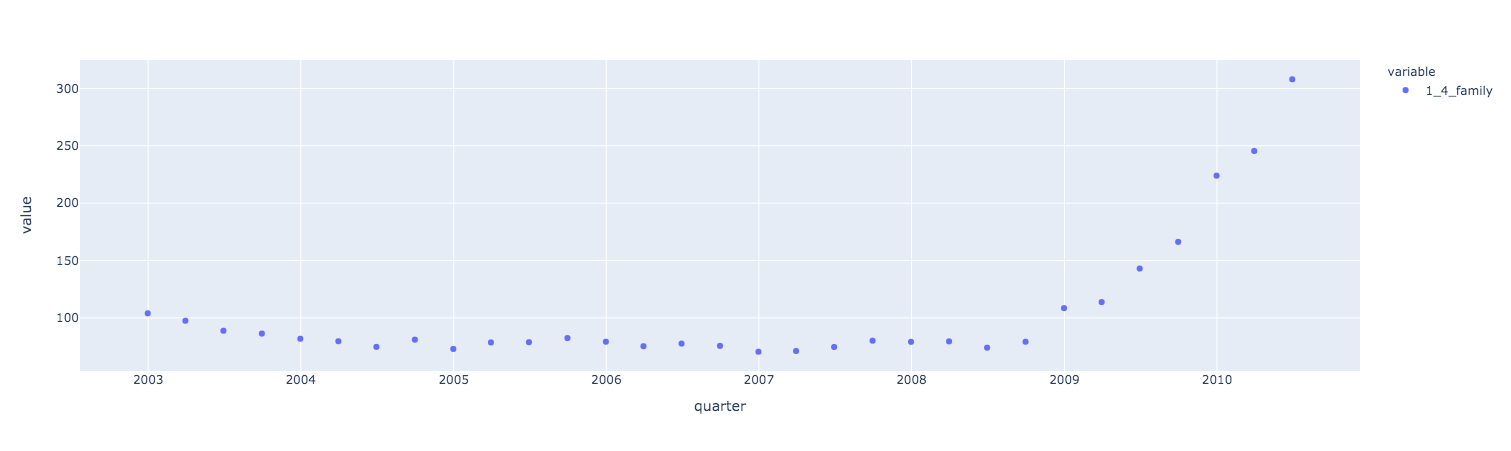

In [9]:
# PLOT 3:

px.scatter(
    av_re_1_4_family_failed_banks_2008_2010_df
)

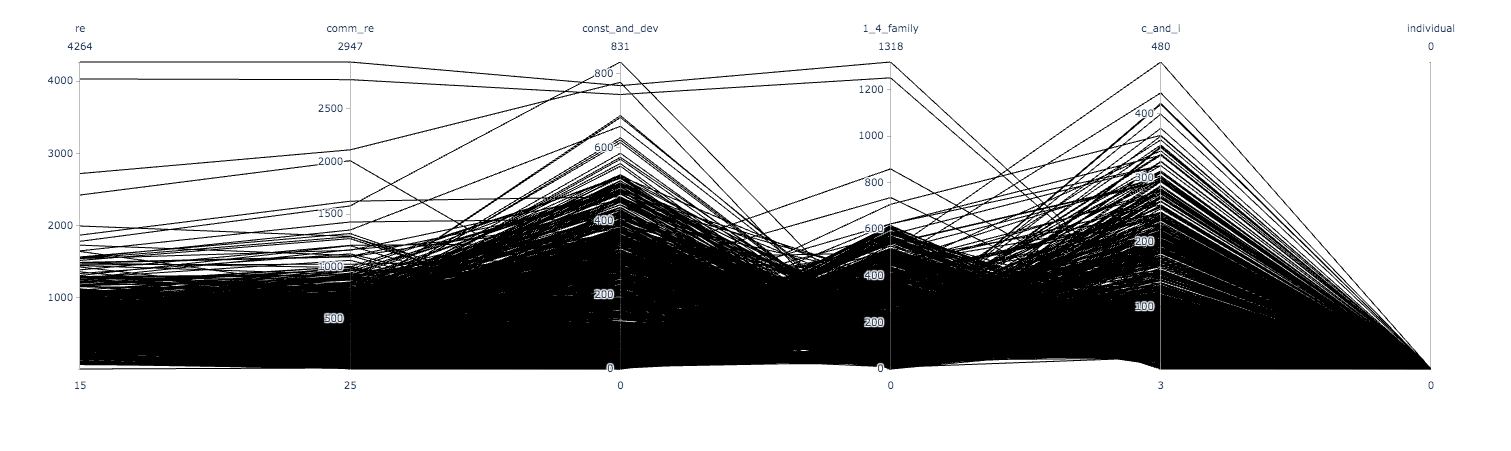

In [10]:
# PLOT 4:

# Convert datatype of "individual" column from "Object" to "Integer"
all_banks_df["individual"] = all_banks_df["individual"].astype("int")

px.parallel_coordinates(all_banks_df, color='individual', color_continuous_scale=px.colors.sequential.Inferno)

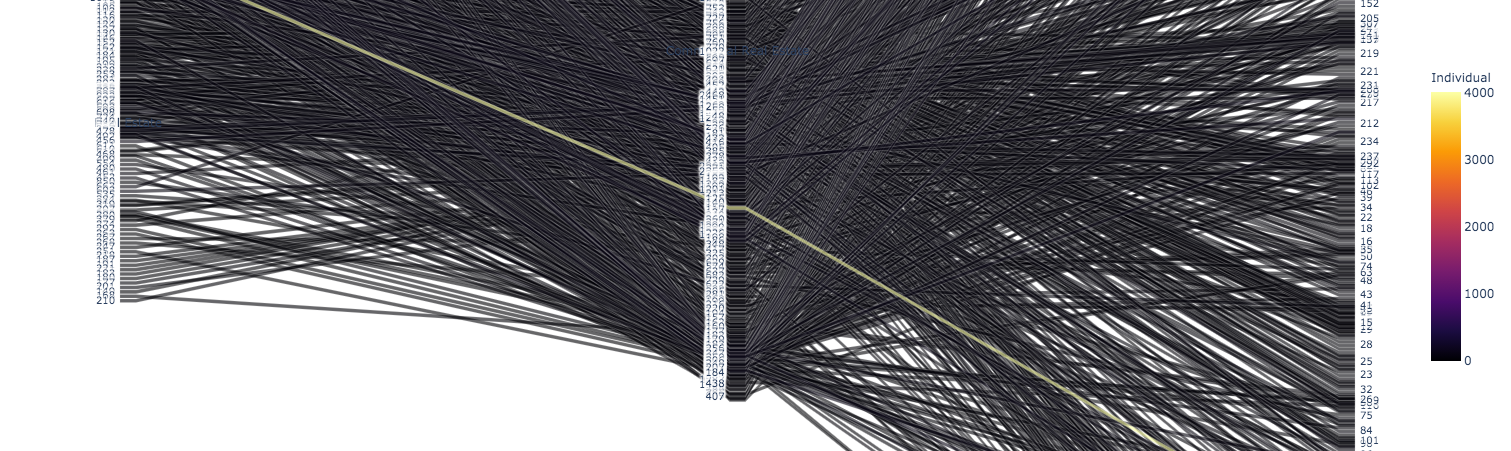

In [11]:
# PLOT 5:

px.parallel_categories(
    all_banks_df,
    dimensions=["re", "comm_re", "1_4_family"],
    color="individual",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "bank_name": "Bank Name",
        "re": "Real Estate",
        "comm_re": "Commercial Real Estate",
        "comm_re_noo": "Commercial Real Estate NOO",
        "const_and_dev": "Construction and Development",
        "1_4_family": "1-4 Family",
        "c_and_i": "Commercial and Industrial",
        "individual": "Individual"
    },
)

In [12]:
failed_banks_post_2010_df.dtypes

bank_name         object
re                 int64
comm_re            int64
comm_re_noo       object
const_and_dev      int64
1_4_family       float64
c_and_i            int64
individual         int64
dtype: object

In [13]:
failed_banks_post_2010_df["comm_re_noo"] = failed_banks_post_2010_df["comm_re_noo"].astype("int")

ValueError: cannot convert float NaN to integer

In [14]:
# PLOT 5: NOT WORKING BC COMM RE NOO COLUMN IS AN OBJECT, NOT AN INTEGER

# Groupby "quarter" and average the "comm_re_noo" column for "Failed Banks 2008-2010":
av_re_comm_noo_failed_banks_2008_2010_df = failed_banks_2008_2010_df.groupby('quarter')['comm_re_noo'].mean()

# Groupby "quarter" and average the "comm_re_noo" column for "Failed Banks Post 2010":
av_re_comm_noo_failed_banks_post_2010_df = failed_banks_post_2010_df.groupby('quarter')['comm_re_noo'].mean()

# Groupby "quarter" and average the "1_4_family" column for "Active Banks":
av_re_comm_noo_active_banks_df = active_banks_df.groupby('quarter')['comm_re_noo'].mean()

av_re_comm_noo_failed_banks_2008_2010_df.hvplot.line(rot=45, width=1200, height=700, title='Average 1-4 Family Residential Loan Concentration across all 30 banks') * av_re_comm_noo_failed_banks_post_2010_df.hvplot.line(rot=45, width=1200, height=700) * av_re_comm_noo_active_banks_df.hvplot.line(rot=45, width=1200, height=700)

DataError: No numeric types to aggregate